#This file shows a basic information of Expedia training data

#Data fields

##train/test.csv

|Column name	|Description	|Data type|
|---------------|---------------|---------|
|date_time	    |Timestamp	    |string   |
|site_name	|ID of the Expedia point of sale (i.e. Expedia.com, Expedia.co.uk, Expedia.co.jp, ...)	|int|
|posa_continent	|ID of continent associated with site_name	|int|
|user_location_country	|The ID of the country the customer is located	|int|
|user_location_region	|The ID of the region the customer is located	|int|
|user_location_city	|The ID of the city the customer is located	|int|
|orig_destination_distance	|Physical distance between a hotel and a customer at the time of search. A null means the distance could not be calculated	|double|
|user_id	|ID of user	|int|
|is_mobile	|1 when a user connected from a mobile device, 0 otherwise	|tinyint|
|is_package	|1 if the click/booking was generated as a part of a package (i.e. combined with a flight), 0 otherwise	|int|
|channel	|ID of a marketing channel	|int|
|srch_ci	|Checkin date	|string|
|srch_co	|Checkout date	|string|
|srch_adults_cnt	|The number of adults specified in the hotel room	|int|
|srch_children_cnt	|The number of (extra occupancy) children specified in the hotel room	|int|
|srch_rm_cnt	|The number of hotel rooms specified in the search	|int|
|srch_destination_id	|ID of the destination where the hotel search was performed	|int|
|srch_destination_type_id	|Type of destination	|int|
|hotel_continent	|Hotel continent	|int|
|hotel_country	|Hotel country	|int|
|hotel_market	|Hotel market	|int|
|is_booking	|1 if a booking, 0 if a click	|tinyint|
|cnt	|Numer of similar events in the context of the same user session	|bigint|
|hotel_cluster	|ID of a hotel cluster	|int|

##destinations.csv

|Column name	|Description	|Data type|
|-------|------|-------|
|srch_destination_id	|ID of the destination where the hotel search was performed	|int|
|d1-d149	|latent description of search regions	|double|

###import libarries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, integrate
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

:0: FutureWarning: IPython widgets are experimental and may change in the future.


#read data in

In [2]:
df = pd.read_csv('./data/train.csv')

In [3]:
df.head(n=5)

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,0,1,14984,1,0,1,2,50,1457,21


In [4]:
df.describe()

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
count,37670293.000000,37670293.000000,37670293.000000,37670293.000000,37670293.000000,24145292.000000,37670293.000000,37670293.000000,37670293.000000,37670293.000000,...,37670293.000000,37670293.000000,37670293.000000,37670293.000000,37670293.000000,37670293.000000,37670293.000000,37670293.000000,37670293.000000,37670293.000000
mean,9.795271,2.680473,86.108802,308.406012,27753.044729,1970.090027,604451.753178,0.134927,0.248904,5.870761,...,0.332122,1.112663,14441.090544,2.582280,0.079657,1.483384,3.156305,81.296852,600.461884,49.808605
std,11.967544,0.748039,59.243103,208.443750,16782.553196,2232.442430,350617.462041,0.341645,0.432378,3.717095,...,0.731498,0.459115,11066.302332,2.153019,0.270761,1.219776,1.623189,56.171188,511.739127,28.915951
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.005600,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3.000000,66.000000,174.000000,13009.000000,313.167000,298910.000000,0.000000,0.000000,2.000000,...,0.000000,1.000000,8267.000000,1.000000,0.000000,1.000000,2.000000,50.000000,160.000000,25.000000
50%,2.000000,3.000000,66.000000,314.000000,27655.000000,1140.491100,603914.000000,0.000000,0.000000,9.000000,...,0.000000,1.000000,9147.000000,1.000000,0.000000,1.000000,2.000000,50.000000,593.000000,49.000000
75%,14.000000,3.000000,70.000000,385.000000,42413.000000,2552.599300,910168.000000,0.000000,0.000000,9.000000,...,0.000000,1.000000,18790.000000,5.000000,0.000000,2.000000,4.000000,106.000000,701.000000,73.000000
max,53.000000,4.000000,239.000000,1027.000000,56508.000000,12407.902200,1198785.000000,1.000000,1.000000,10.000000,...,9.000000,8.000000,65107.000000,9.000000,1.000000,269.000000,6.000000,212.000000,2117.000000,99.000000


In [5]:
list(df.columns.values)

['date_time',
 'site_name',
 'posa_continent',
 'user_location_country',
 'user_location_region',
 'user_location_city',
 'orig_destination_distance',
 'user_id',
 'is_mobile',
 'is_package',
 'channel',
 'srch_ci',
 'srch_co',
 'srch_adults_cnt',
 'srch_children_cnt',
 'srch_rm_cnt',
 'srch_destination_id',
 'srch_destination_type_id',
 'is_booking',
 'cnt',
 'hotel_continent',
 'hotel_country',
 'hotel_market',
 'hotel_cluster']

In [8]:
df['site_name'].describe()

count    37670293.000000
mean            9.795271
std            11.967544
min             2.000000
25%             2.000000
50%             2.000000
75%            14.000000
max            53.000000
Name: site_name, dtype: float64

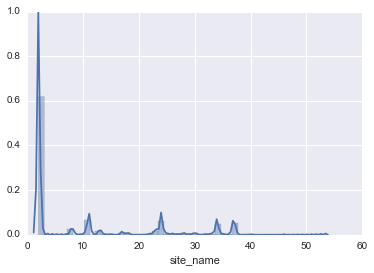

In [6]:
sns.distplot(df['site_name']);

In [9]:
df['posa_continent'].describe()

count    37670293.000000
mean            2.680473
std             0.748039
min             0.000000
25%             3.000000
50%             3.000000
75%             3.000000
max             4.000000
Name: posa_continent, dtype: float64

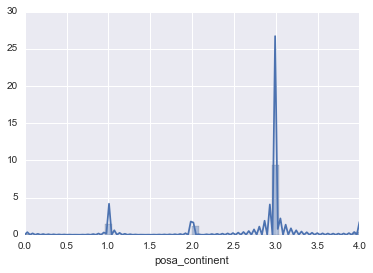

In [7]:
sns.distplot(df['posa_continent']);

In [10]:
df['user_location_country'].describe()

count    37670293.000000
mean           86.108802
std            59.243103
min             0.000000
25%            66.000000
50%            66.000000
75%            70.000000
max           239.000000
Name: user_location_country, dtype: float64

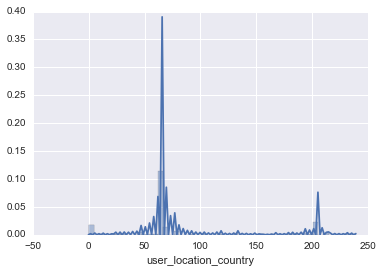

In [8]:
sns.distplot(df['user_location_country']);

In [11]:
df['user_location_region'].describe()

count    37670293.000000
mean          308.406012
std           208.443750
min             0.000000
25%           174.000000
50%           314.000000
75%           385.000000
max          1027.000000
Name: user_location_region, dtype: float64

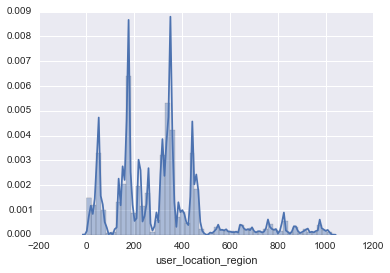

In [4]:
sns.distplot(df['user_location_region'].dropna());

In [12]:
df['user_location_city'].describe()

count    37670293.000000
mean        27753.044729
std         16782.553196
min             0.000000
25%         13009.000000
50%         27655.000000
75%         42413.000000
max         56508.000000
Name: user_location_city, dtype: float64

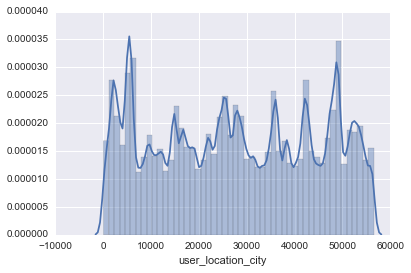

In [7]:
sns.distplot(df['user_location_city'].dropna());

In [13]:
df['orig_destination_distance'].describe()

count    24145292.000000
mean         1970.090027
std          2232.442430
min             0.005600
25%           313.167000
50%          1140.491100
75%          2552.599300
max         12407.902200
Name: orig_destination_distance, dtype: float64

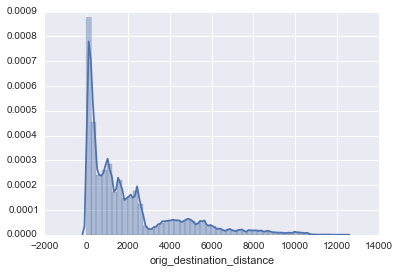

In [3]:
sns.distplot(df['orig_destination_distance'].dropna());

In [3]:
df['is_mobile'].describe()

count    37670293.000000
mean            0.134927
std             0.341645
min             0.000000
25%             0.000000
50%             0.000000
75%             0.000000
max             1.000000
Name: is_mobile, dtype: float64

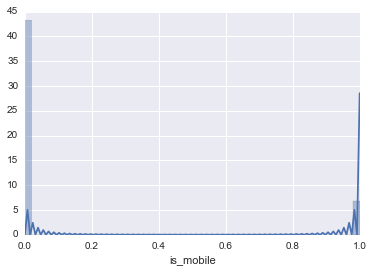

In [5]:
sns.distplot(df['is_mobile'].dropna());

In [4]:
df['is_package'].describe()

count    37670293.000000
mean            0.248904
std             0.432378
min             0.000000
25%             0.000000
50%             0.000000
75%             0.000000
max             1.000000
Name: is_package, dtype: float64

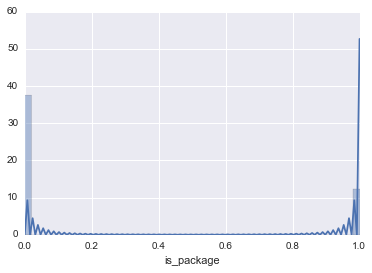

In [6]:
sns.distplot(df['is_package'].dropna());

In [14]:
df['channel'].describe()

count    37670293.000000
mean            5.870761
std             3.717095
min             0.000000
25%             2.000000
50%             9.000000
75%             9.000000
max            10.000000
Name: channel, dtype: float64

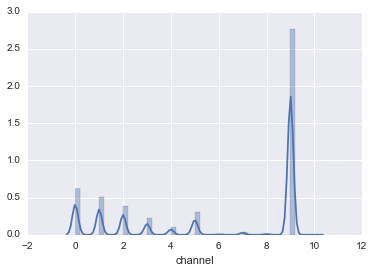

In [15]:
sns.distplot(df['channel'].dropna());

In [16]:
df['srch_ci'].describe()

count       37623210
unique          1269
top       2014-12-26
freq          223153
Name: srch_ci, dtype: object

In [17]:
df['srch_ci'][1:5]

1    2014-08-29
2    2014-08-29
3    2014-11-23
4    2014-11-23
Name: srch_ci, dtype: object

In [18]:
df['srch_co'].describe()

count       37623209
unique          1262
top       2015-01-02
freq          218447
Name: srch_co, dtype: object

In [19]:
df['srch_co'][1:5]

1    2014-09-02
2    2014-09-02
3    2014-11-28
4    2014-11-28
Name: srch_co, dtype: object

In [20]:
df['srch_adults_cnt'].describe()

count    37670293.000000
mean            2.024296
std             0.911668
min             0.000000
25%             2.000000
50%             2.000000
75%             2.000000
max             9.000000
Name: srch_adults_cnt, dtype: float64

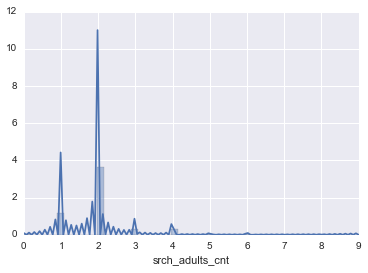

In [21]:
sns.distplot(df['srch_adults_cnt'].dropna());

In [22]:
df['srch_destination_id'].describe()

count    37670293.000000
mean        14441.090544
std         11066.302332
min             0.000000
25%          8267.000000
50%          9147.000000
75%         18790.000000
max         65107.000000
Name: srch_destination_id, dtype: float64

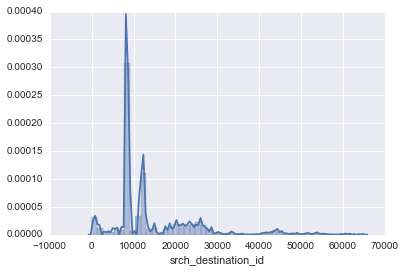

In [23]:
sns.distplot(df['srch_destination_id'].dropna());

In [24]:
df['srch_destination_type_id'].describe()

count    37670293.000000
mean            2.582280
std             2.153019
min             0.000000
25%             1.000000
50%             1.000000
75%             5.000000
max             9.000000
Name: srch_destination_type_id, dtype: float64

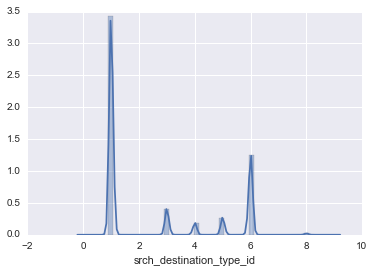

In [25]:
sns.distplot(df['srch_destination_type_id'].dropna());

In [26]:
df['is_booking'].describe()

count    37670293.000000
mean            0.079657
std             0.270761
min             0.000000
25%             0.000000
50%             0.000000
75%             0.000000
max             1.000000
Name: is_booking, dtype: float64

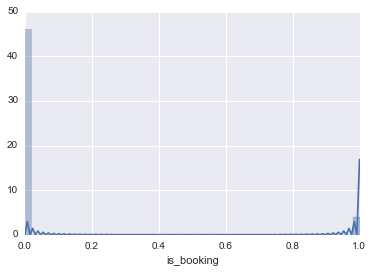

In [27]:
sns.distplot(df['is_booking'].dropna());

In [28]:
df['cnt'].describe()

count    37670293.000000
mean            1.483384
std             1.219776
min             1.000000
25%             1.000000
50%             1.000000
75%             2.000000
max           269.000000
Name: cnt, dtype: float64

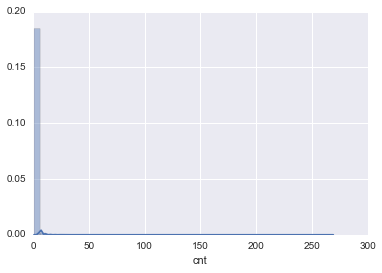

In [29]:
sns.distplot(df['cnt'].dropna());

In [30]:
df['hotel_continent'].describe()

count    37670293.000000
mean            3.156305
std             1.623189
min             0.000000
25%             2.000000
50%             2.000000
75%             4.000000
max             6.000000
Name: hotel_continent, dtype: float64

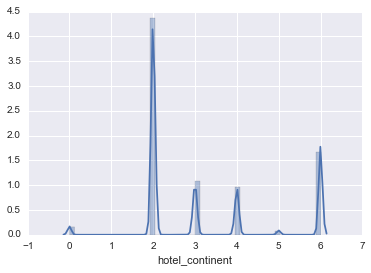

In [31]:
sns.distplot(df['hotel_continent'].dropna());

In [32]:
df['hotel_country'].describe()

count    37670293.000000
mean           81.296852
std            56.171188
min             0.000000
25%            50.000000
50%            50.000000
75%           106.000000
max           212.000000
Name: hotel_country, dtype: float64

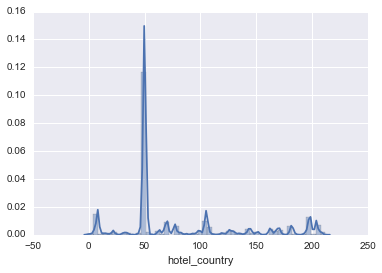

In [33]:
sns.distplot(df['hotel_country'].dropna());

In [34]:
df['hotel_market'].describe()

count    37670293.000000
mean          600.461884
std           511.739127
min             0.000000
25%           160.000000
50%           593.000000
75%           701.000000
max          2117.000000
Name: hotel_market, dtype: float64

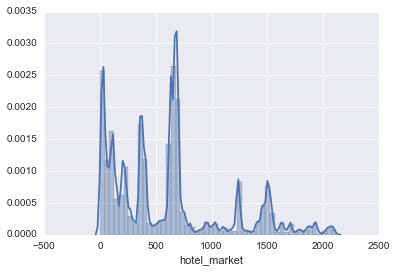

In [35]:
sns.distplot(df['hotel_market'].dropna());

In [36]:
df['hotel_cluster'].describe()

count    37670293.000000
mean           49.808605
std            28.915951
min             0.000000
25%            25.000000
50%            49.000000
75%            73.000000
max            99.000000
Name: hotel_cluster, dtype: float64

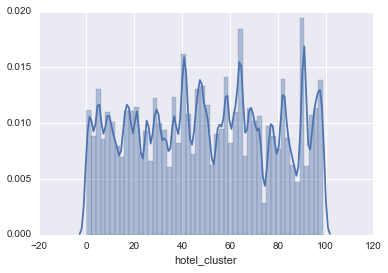

In [37]:
sns.distplot(df['hotel_cluster'].dropna());